<a href="https://colab.research.google.com/github/halimcan/Home-Credit-Default-Project/blob/master/Credit_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Installments of required tables
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [1]:
#  BigQuery API’ı aktifleştir
from google.colab import auth
auth.authenticate_user()


In [2]:
# big query eklentisi cekme

!pip install --quiet google-cloud-bigquery
from google.cloud import bigquery


# Tablolarin BigQueryden Pythona cekilmesi

Application Training datasinin cekilmesi

In [25]:
# BigQuery client oluştur
client = bigquery.Client(project="homecredit-478707")

# Tabloyu BigQuery'den çek
query = """
SELECT *
FROM `homecredit-478707.Homecredit_Tables.application_training`
"""
app_train = client.query(query).to_dataframe()

In [27]:
app_train.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100003,0,Cash loans,F,False,False,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100122,0,Cash loans,F,False,False,1,76500.0,808650.0,26217.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100179,0,Cash loans,F,True,False,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0


In [28]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: Int64(41), boolean(3), float64(65), object(13)
memory usage: 293.0+ MB


In [29]:
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.0,307511.0,307511.0,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.0,307511.0,...,307511.0,307511.0,307511.0,307511.0,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.00813,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.0,0.0,0.0,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.0,-17912.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.5,0.0,0.0,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.0,-2760.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.0,0.0,0.0,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.0,-1213.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.5,0.0,1.0,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.0,-289.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.0,1.0,19.0,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.0,365243.0,...,1.0,1.0,1.0,1.0,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [30]:
# Primary key kontrolü

print("Primary key unique?", app_train['SK_ID_CURR'].is_unique)

Primary key unique? True


In [31]:
import pandas as pd

# 4) Null oranları
null_ratio = app_train.isnull().sum() / len(df)
null_ratio = null_ratio.sort_values(ascending=False)
print(null_ratio.head(20))  # en çok null olan 20 kolon

# There are lots of variables with too many missing values. As I will use LightGBM, I am going to left it as it is.

COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
COMMONAREA_MEDI             0.698723
NONLIVINGAPARTMENTS_MEDI    0.694330
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
FONDKAPREMONT_MODE          0.683862
LIVINGAPARTMENTS_AVG        0.683550
LIVINGAPARTMENTS_MEDI       0.683550
LIVINGAPARTMENTS_MODE       0.683550
FLOORSMIN_MODE              0.678486
FLOORSMIN_AVG               0.678486
FLOORSMIN_MEDI              0.678486
YEARS_BUILD_AVG             0.664978
YEARS_BUILD_MODE            0.664978
YEARS_BUILD_MEDI            0.664978
OWN_CAR_AGE                 0.659908
LANDAREA_MEDI               0.593767
LANDAREA_AVG                0.593767
LANDAREA_MODE               0.593767
dtype: float64


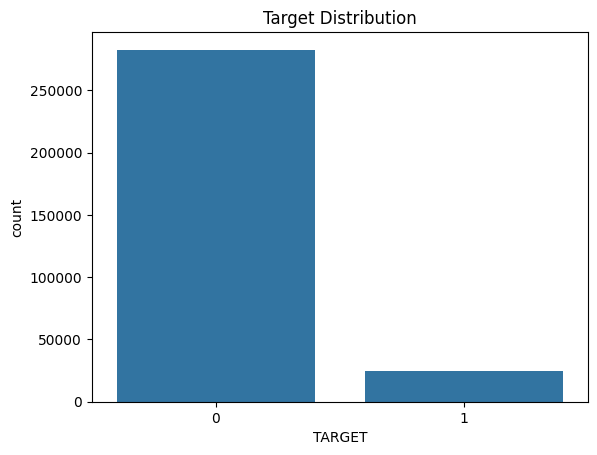

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: Float64


In [32]:
# 5) Target distribution


sns.countplot(x='TARGET', data=app_train)
plt.title("Target Distribution")
plt.show()
print(app_train['TARGET'].value_counts(normalize=True))

Target variable is dominated by less risky applicants(%91)

In [24]:
# 6) Numerical variables summary
numeric_cols = app_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(app_train[numeric_cols].describe())

# 106 numerical variables.

          SK_ID_CURR    TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count       307511.0  307511.0      307511.0      3.075110e+05  3.075110e+05   
mean   278180.518577  0.080729      0.417052      1.687979e+05  5.990260e+05   
std    102790.175348  0.272419      0.722121      2.371231e+05  4.024908e+05   
min         100002.0       0.0           0.0      2.565000e+04  4.500000e+04   
25%         189145.5       0.0           0.0      1.125000e+05  2.700000e+05   
50%         278202.0       0.0           0.0      1.471500e+05  5.135310e+05   
75%         367142.5       0.0           1.0      2.025000e+05  8.086500e+05   
max         456255.0       1.0          19.0      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  307499.000000     3.072330e+05               307511.000000   
mean    27108.573909     5.383962e+05                    0.020868   
std     14493.737315     3.694465e+05                    0.013831   
min

In [33]:
# 7) Categorical variable summary(only 10)
categorical_cols = app_train.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    print(f"{col} value counts:")
    print(app_train[col].value_counts().head(10))


NAME_CONTRACT_TYPE value counts:
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64
CODE_GENDER value counts:
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64
NAME_TYPE_SUITE value counts:
NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64
NAME_INCOME_TYPE value counts:
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64
NAME_EDUCATION_TYPE value counts:
NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondar

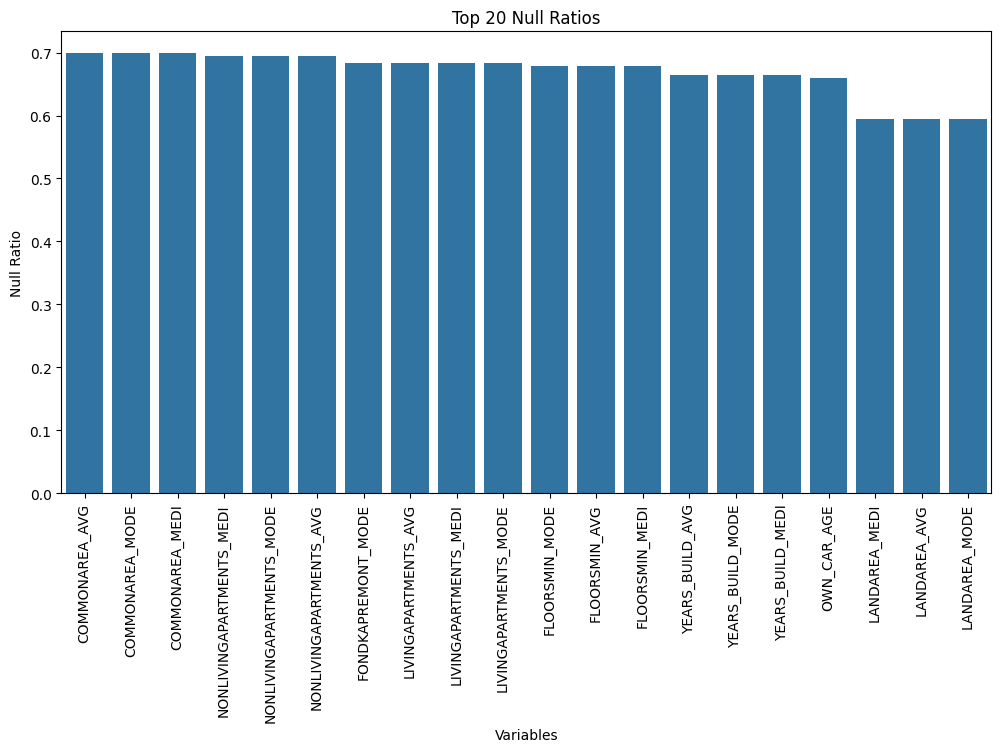

In [35]:
# 8) Null ratio vis
plt.figure(figsize=(12,6))
sns.barplot(x=null_ratio.head(20).index, y=null_ratio.head(20).values)
plt.xticks(rotation=90)
plt.xlabel("Variables")
plt.ylabel("Null Ratio")
plt.title("Top 20 Null Ratios")
plt.show()